# Pre-Req:


In [1]:
#Project Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error, make_scorer
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import KFold


In [2]:
#Creating datframe from test csv
TrainDataset = pd.read_csv('/content/train.csv')

In [3]:
#Creating dataframe from test csv
TestDataset = pd.read_csv('/content/test.csv')

# Data Clean-Up:

*   Train Dataset:

In [4]:
#Observe Dataset in unmodified form
TrainDataset.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [5]:
#Check for null inputs
TrainDataset.isnull().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [6]:
#Encoding TrainDataset - Making the Dataset numeric for machine learning purposes

##########################################################################Encoding##########################################################################

#Intialise encoder
le = LabelEncoder()

############################Gender
TrainDataset['Sex'] = le.fit_transform(TrainDataset['Sex'])

In [7]:
TrainDataset.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,0,38,166.0,61.0,25.0,102.0,40.6,146.0


In [8]:
#Check Traindataset is completley numeric

all_numeric = TrainDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()

print(f"Are all values numeric? {all_numeric}")

<ipython-input-8-e256ebf0ef36>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_numeric = TrainDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()


Are all values numeric? True




*   Test Dataset:




In [9]:
#Observe Dataset in unmodified form
TestDataset.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [10]:
#Check for null inputs
TestDataset.isnull().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [11]:
#Encoding TrainDataset - Making the Dataset numeric for machine learning purposes

##########################################################################Encoding##########################################################################

#Intialise encoder
le = LabelEncoder()

############################Gender
TestDataset['Sex'] = le.fit_transform(TestDataset['Sex'])

In [12]:
#Check Traindataset is completley numeric

all_numeric = TestDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()

print(f"Are all values numeric? {all_numeric}")

<ipython-input-12-b4fbbe99d19c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_numeric = TestDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()


Are all values numeric? True


# Data Analysis:

In [13]:
#Basic look
TrainDataset.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,0,38,166.0,61.0,25.0,102.0,40.6,146.0


In [14]:
#Mean average of age and calories
TrainDataset.groupby('Age')['Calories'].mean()

,Calories
Age,
20,69.483013
21,80.085463
22,83.715948
23,83.446884
24,72.703036
25,79.494027
26,80.520233
27,79.243879
28,78.976703


In [15]:
#Find duplicates in datasets
TrainDataDuplicates = TrainDataset[TrainDataset.duplicated()]

# Show duplicate rows
print("Duplicate rows within train dataset:")
print(TrainDataDuplicates)
print("\n")
TestDataDuplicates = TestDataset[TestDataset.duplicated()]
# Show duplicate rows
print("Duplicate rows within train dataset:")
print(TestDataDuplicates)

Duplicate rows within train dataset:
Empty DataFrame
Columns: [id, Sex, Age, Height, Weight, Duration, Heart_Rate, Body_Temp, Calories]
Index: []


Duplicate rows within train dataset:
Empty DataFrame
Columns: [id, Sex, Age, Height, Weight, Duration, Heart_Rate, Body_Temp]
Index: []


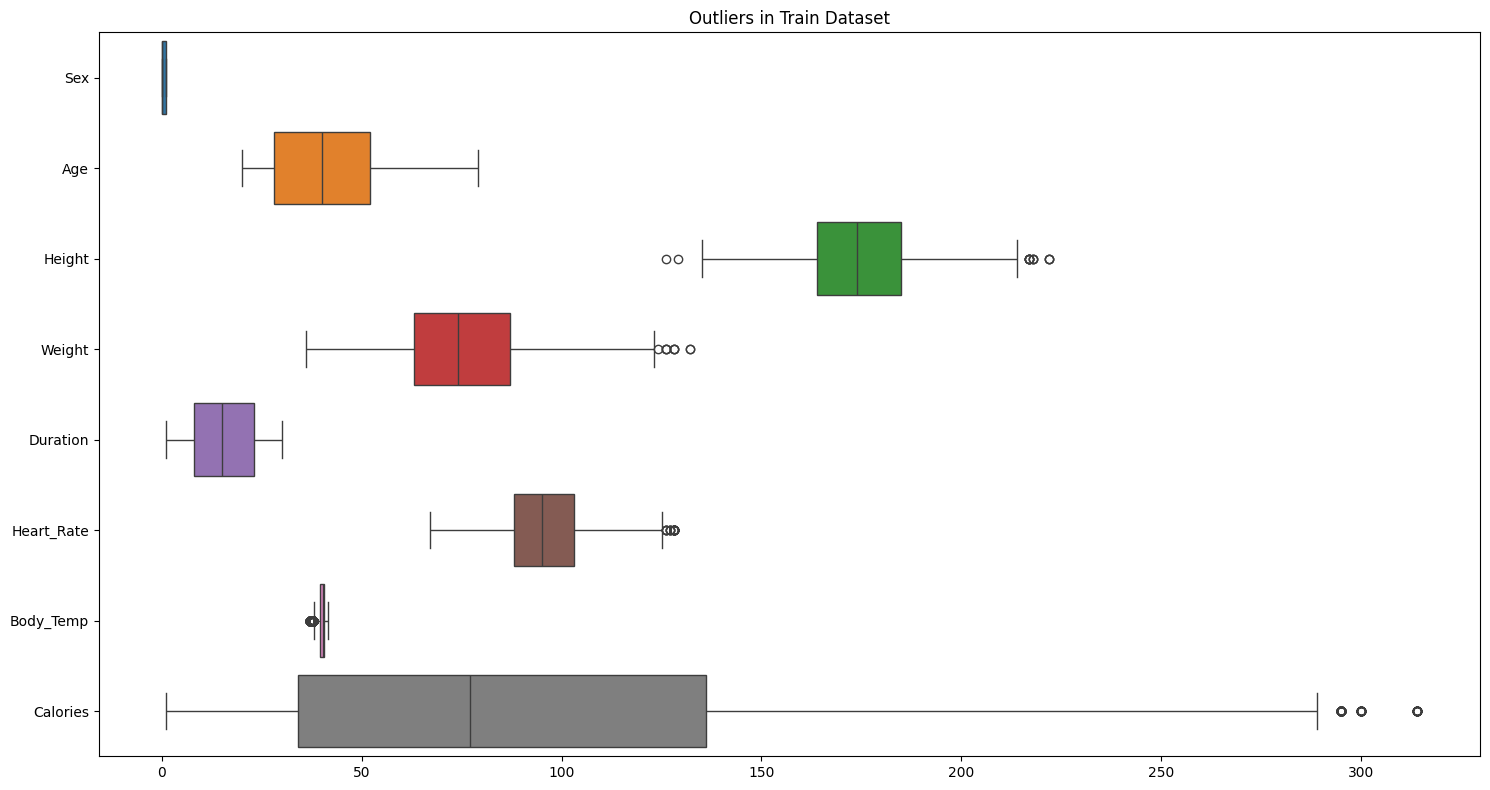

In [16]:
#Check for outliers in traindataset

numeric_cols = TrainDataset.select_dtypes(include='number').drop(columns=['id'])

# Create box plots for all numeric columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_cols, orient='h')
plt.title('Outliers in Train Dataset')
plt.tight_layout()
plt.show()

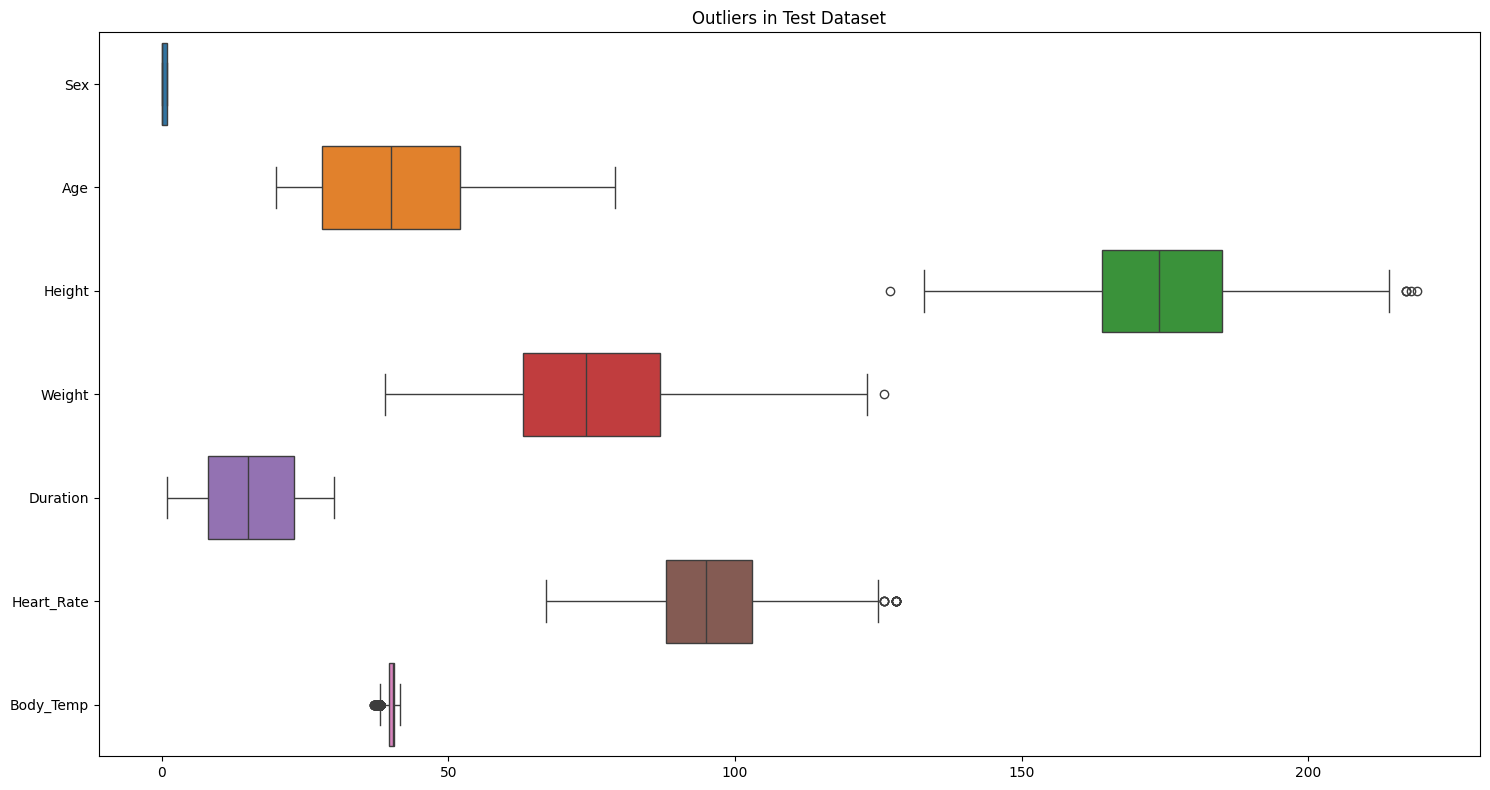

In [ ]:
#Check for outliers in testdataset

numeric_cols = TestDataset.select_dtypes(include='number').drop(columns=['id'])

# Create box plots for all numeric columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_cols, orient='h')
plt.title('Outliers in Test Dataset')
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Heart_Rate'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Body_Temp'}>, <Axes: >, <Axes: >]],
      dtype=object)

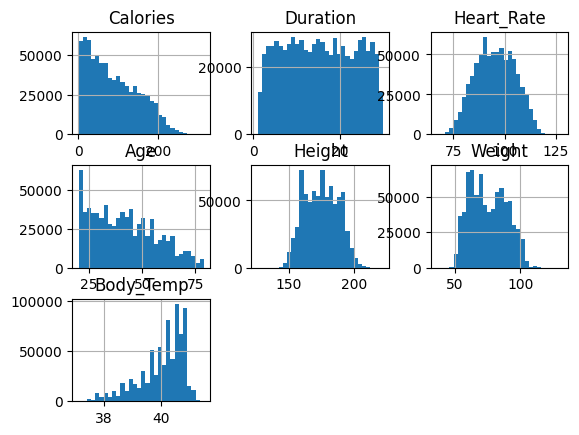

In [17]:
#Looking for skewed data
TrainDataset[['Calories', 'Duration', 'Heart_Rate','Age','Height'	,'Weight'	, 'Body_Temp']].hist(bins=30)

In [ ]:
#Calories is skewed left, lets take a look
print(TrainDataset['Body_Temp'].min())

37.1


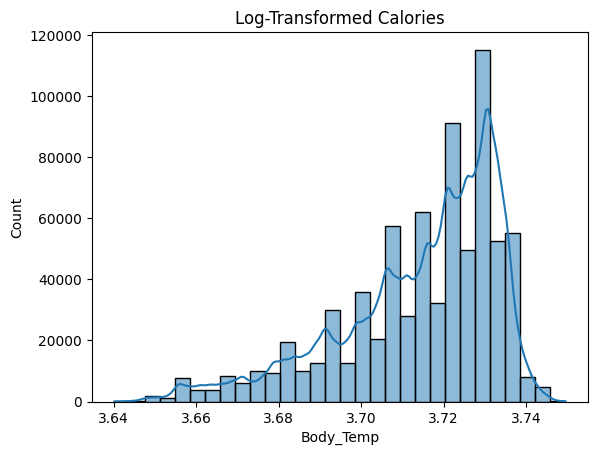

In [18]:
import seaborn as sns

sns.histplot(np.log1p(TrainDataset['Body_Temp']), bins=30, kde=True)
plt.title('Log-Transformed Calories')
plt.show()

In [19]:
low_calories = TrainDataset[TrainDataset['Calories'] < 50]
print(low_calories.sort_values(by='Calories'))


            id  Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
43875    43875    1   21   191.0    93.0       1.0        76.0       37.7   
468882  468882    1   33   182.0    83.0       1.0        73.0       37.7   
109337  109337    1   25   177.0    79.0       1.0        76.0       37.7   
43419    43419    1   26   178.0    76.0       1.0        80.0       37.7   
719085  719085    1   23   180.0    78.0       1.0        78.0       37.7   
...        ...  ...  ...     ...     ...       ...         ...        ...   
40000    40000    1   48   169.0    79.0      11.0        90.0       39.7   
490093  490093    1   24   207.0   103.0       9.0       101.0       39.7   
490064  490064    0   50   159.0    57.0      10.0        92.0       39.9   
636085  636085    1   30   184.0    84.0      12.0        93.0       40.0   
636011  636011    1   67   160.0    64.0      10.0        88.0       39.6   

        Calories  
43875        1.0  
468882       1.0  
109337       1.0  

In [ ]:
#Did not improve score

#Lets replace low calories with an average to imporove the quality of the data going into the model
# Step 1: Compute mean of valid calories (≥ 50)
#valid_meanTrain = TrainDataset.loc[TrainDataset['Calories'] >= 50, 'Calories'].mean()

# Step 2: Replace low values (< 50) with that mean
#TrainDataset.loc[TrainDataset['Calories'] < 50, 'Calories'] = valid_meanTrain


In [20]:
#Lets replace body temp with an average to imporove the quality of the data going into the model
# Step 1: Compute mean of valid calories (≥ 50)
valid_meanTrain = TrainDataset.loc[TrainDataset['Body_Temp'] >= 37.4, 'Body_Temp'].mean()

# Step 2: Replace low values (< 50) with that mean
TrainDataset.loc[TrainDataset['Body_Temp'] < 37.4, 'Body_Temp'] = valid_meanTrain

valid_meanTest = TestDataset.loc[TestDataset['Body_Temp'] >= 37.4, 'Body_Temp'].mean()

# Step 2: Replace low values (< 50) with that mean
TestDataset.loc[TestDataset['Body_Temp'] < 37.4, 'Body_Temp'] = valid_meanTest

**Using Robust Scaler to remove outliers:**

In [ ]:
#Commented out as does not improve RMSLE

#columns_to_scale = ['Height', 'Weight', 'Heart_Rate', 'Body_Temp']  # replace with your actual columns

# Initialize the scaler
#scaler = RobustScaler()

# Fit on training data and transform both train and test sets
#TrainDataset[columns_to_scale] = scaler.fit_transform(TrainDataset[columns_to_scale])
#TestDataset[columns_to_scale] = scaler.transform(TestDataset[columns_to_scale])

In [ ]:
#Creating outlier flags
for col in ['Height', 'Weight', 'Heart_Rate', 'Body_Temp']:
    q1 = TrainDataset[col].quantile(0.25)
    q3 = TrainDataset[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    TrainDataset[f'{col}_outlier'] = ((TrainDataset[col] < lower) | (TrainDataset[col] > upper)).astype(int)
    TestDataset[f'{col}_outlier'] = ((TestDataset[col] < lower) | (TestDataset[col] > upper)).astype(int)

# Model 1 - XGBoost:

In [ ]:
# Split data into features and target
X_train = TrainDataset.drop(columns=['id', 'Calories'])
y_train = TrainDataset['Calories']

# Parameters
Model = XGBRegressor(objective='reg:squarederror',
                     max_depth=12,
                     learning_rate=0.01,
                     n_estimators=700,
                     subsample=0.8,
                     colsample_bytree=1.0,
                     gamma=1,
                     random_state=42)
Model.fit(X_train, y_train)

# Predict on the test dataset (dropping the id column)
X_test = TestDataset.drop(columns=['id'])
Predictions = Model.predict(X_test)

# Create a submission DataFrame with id and predictions
Submission = TestDataset[['id']].copy()
Submission['Calories'] = Predictions

# Calculate the RMSLE on the training data
y_pred_train = Model.predict(X_train)

# Ensure no negative predictions or targets (RMSLE requires non-negative values)
y_pred_train = np.maximum(0, y_pred_train)
y_train_clipped = np.maximum(0, y_train)

rmsle = np.sqrt(mean_squared_log_error(y_train_clipped, y_pred_train))
print("Root Mean Squared Log Error (RMSLE) on Training Data:", rmsle)

# Export the submission to a CSV file
Submission.to_csv('XGBoostPredictionsKaggleModel1.csv', index=False)

Root Mean Squared Log Error (RMSLE) on Training Data: 0.053339205917203134


ideas


pass through neural network?

In [ ]:
620 10

SyntaxError: invalid syntax (<ipython-input-68-6f81794c5e91>, line 1)

# Model 2 - LightGBM:

In [21]:
# =========================
# Config
# =========================
target_column = 'Calories'  # Replace with your actual target column
id_column = 'ID'
output_filename = 'LightGBMPredictionsKaggleModel_RandomSearch.csv'

# =========================
# Data Preparation
# =========================
X = TrainDataset.drop(columns=[target_column, id_column], errors='ignore')
y = TrainDataset[target_column]
X_test = TestDataset.drop(columns=[id_column], errors='ignore')

# =========================
# Log-transform the target for RMSLE optimization
# =========================
y_log = np.log1p(y)

# =========================
# Define RMSLE scorer
# =========================
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# =========================
# Parameter Distribution for RandomizedSearchCV
# =========================
param_dist = {
    'num_leaves': [15, 25, 45, 60],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'min_child_samples': [17, 22, 33, 40],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.01, 0.1, 1.0],
    'reg_lambda': [0.0, 0.01, 0.1, 1.0],
    'max_depth': [-5, 0, 5],
}

# =========================
# LightGBM Regressor
# =========================
model = lgb.LGBMRegressor(n_estimators=800, random_state=42)

# =========================
# RandomizedSearchCV
# =========================
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=75,
    scoring=rmsle_scorer,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# =========================
# Fit the model
# =========================
random_search.fit(X, y_log)

# =========================
# Best model and parameters
# =========================
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# =========================
# Predict on test set
# =========================
test_preds_log = best_model.predict(X_test)
test_preds = np.expm1(test_preds_log)  # Inverse of log1p
test_preds = np.maximum(test_preds, 0)  # Ensure no negatives

# =========================
# Save predictions to CSV
# =========================
output_df = pd.DataFrame({
    id_column: TestDataset[id_column] if id_column in TestDataset else np.arange(len(test_preds)),
    target_column: test_preds
})
output_df.to_csv(output_filename, index=False)
print(f"Predictions saved to {output_filename}")

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 750000, number of used features: 8
[LightGBM] [Info] Start training from score 4.141144
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1.0, 'reg_alpha': 1.0, 'num_leaves': 45, 'min_child_samples': 40, 'max_depth': -5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Predictions saved to LightGBMPredictionsKaggleModel_RandomSearch.csv
